In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [32]:
url = './titanic.csv'
titanic = pd.read_csv(url)


titanic['passengerId'] = pd.Series(range(1,892))
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15,passengerId
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN,4
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN,5


In [111]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Unnamed: 15    891
passengerId      0
dtype: int64

In [118]:
# age에 있는 널값을 평균값으로 대체해보자
titanic.age.fillna(titanic.age.mean(), inplace = True)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Unnamed: 15    891
passengerId      0
dtype: int64

### set 'passengerID' as index

In [36]:
titanic.set_index('passengerId').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15,passengerId
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN,4
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN,5


## Create a pie chart presenting the male/female proportion


In [67]:
list(titanic.groupby('sex').size())

[314, 577]

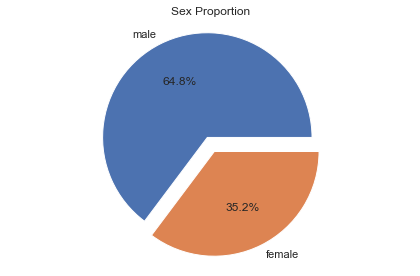

In [69]:
# sum the instance of female and male
maleCnt = (titanic['sex']== 'male').sum()
femaleCnt = (titanic['sex']== 'female').sum()

# put them in the list
proportion = [maleCnt, femaleCnt]

#list(titanic.groupby('sex').size()) # 위 세줄을 한큐에 해결

# plot pie chart 
plt.pie(proportion, labels = ['male', 'female'],# with one slide exploded out
    explode = (0.15 , 0),# with the percent listed as a fraction
    autopct = '%1.1f%%') #*gets list 

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plo
plt.tight_layout()
plt.show()

use pd.plot.pie()

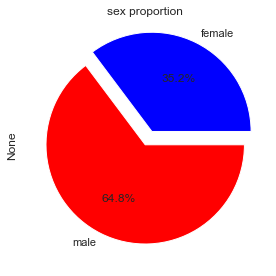

In [81]:
titanic.groupby('sex').size().plot.pie(explode = (0.15, 0), 
                                       colors = ['blue','red'],
                                       autopct='%1.1f%%')
plt.title('sex proportion')
plt.tight_layout()
plt.show()

## Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Fare x Age')

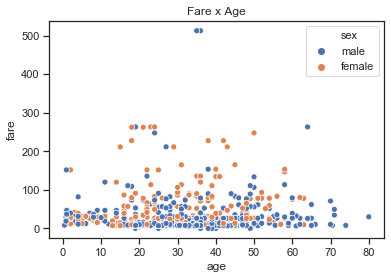

In [97]:
sns.scatterplot(data=titanic, x = 'age', y = 'fare', hue = 'sex')
plt.title('Fare x Age')

### 나이를 구간별로 나누고 생존자와 사망자를 바 그래프로 표시해보자

In [119]:
titanic.age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

구간나누기 

bins : 나눌 구간을 내가 지정한다. 

bins_label: 구간의 이름을 지정한다

pd.cut(data = , bins =, labels= , right = ) 함수를 활용해 구간을 나눈다. 

right = False 로 지정한다. 이유는 A 이상 B 미만 이기때문에 B부분을 포함시키지 않기 위해서. 



In [121]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] #80세가 있으니 그 다음 구간 90까지 우선 지정
bins_label = [str(x) + 's ' for x in bins][:-1] #마지막 구간 제외
titanic['ageCate'] = pd.cut(titanic.age, bins, right=False, labels = bins_label)

In [163]:
grouped = titanic.groupby(['ageCate']) #, 'survived'])
grouped.survived.size()

ageCate
0s       62
10s     102
20s     397
30s     167
40s      89
50s      48
60s      19
70s       6
80s       1
Name: survived, dtype: int64

In [154]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15,passengerId,ageCate
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN,1,20s
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN,2,30s
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN,3,20s
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN,4,30s
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN,5,30s


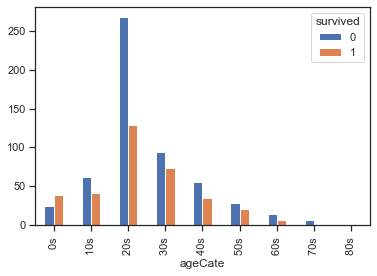

In [220]:
grouped = titanic.groupby(['ageCate','survived'])
grouped.size().unstack().plot.bar()

### 나이대별로 구간 나눈 뒤 성별에 따른 빈도수를 바그래프로 나타내기

In [229]:
grouped = titanic.groupby(['ageCate', 'sex'])

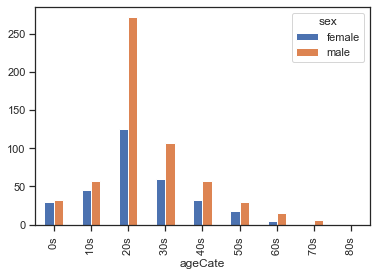

In [231]:
grouped.size().unstack().plot.bar()

In [240]:
grouped = titanic.groupby(['ageCate', 'sex', 'survived'])
grouped.size().unstack()

survived          0   1
ageCate sex            
0s      female   11  19
        male     13  19
10s     female   11  34
        male     50   7
20s     female   37  88
        male    231  41
30s     female   10  50
        male     84  23
40s     female   10  22
        male     45  12
50s     female    2  16
        male     26   4
60s     female    0   4
        male     13   2
70s     female    0   0
        male      6   0
80s     female    0   0
        male      0   1

#### How many people survived?

In [237]:
titanic.survived.sum()

342

#### Create a histogram with the Fare payed

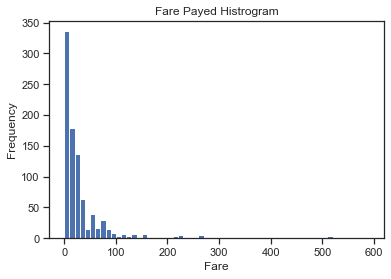

In [250]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.fare.sort_values(ascending = False)
df

# create bins interval using numpy
bins = np.arange(0,600,10) # 구간 설정
bins

# use plt to plot histogram

plt.hist(df, bins = bins)


# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()